# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("../data/ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [4]:
# Load the data
data = pd.read_csv("../data/ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


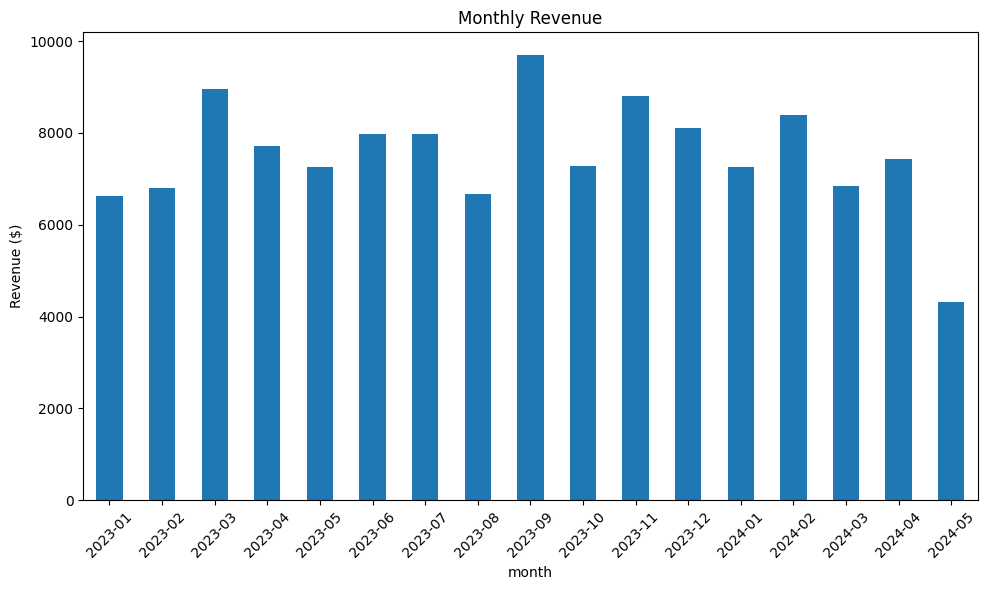

In [5]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

In [6]:
# Question 1: Revenue Overview
# Load the data
data = pd.read_csv("ecommerce_data.csv")
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")

# Calculate total revenue
total_revenue = data["revenue"].sum()

# Break down by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("\nMonthly Revenue Breakdown:")
print(monthly_revenue)

# Create visualization
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind="bar", color="skyblue", edgecolor="navy")
plt.title("Monthly Revenue Breakdown", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# Additional insights
print(f"\nAverage Monthly Revenue: ${monthly_revenue.mean():,.2f}")
print(f"Highest Revenue Month: {monthly_revenue.idxmax()} (${monthly_revenue.max():,.2f})")
print(f"Lowest Revenue Month: {monthly_revenue.idxmin()} (${monthly_revenue.min():,.2f})")

# Total Revenue last quarter (3months) = 4314.71 + 7430.29 + 6835.73 = 18580.73


FileNotFoundError: [Errno 2] No such file or directory: 'ecommerce_data.csv'

Top 5 Customers by Total Revenue:
1. Customer ID 62: $4,448.39
2. Customer ID 24: $3,369.44
3. Customer ID 90: $2,976.78
4. Customer ID 92: $2,838.74
5. Customer ID 97: $2,835.62


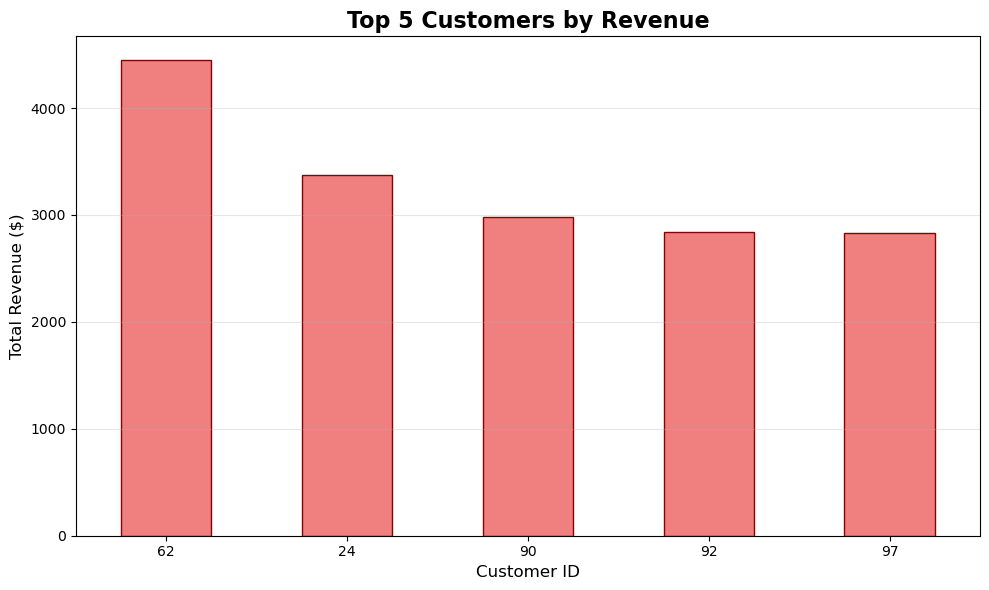


Insights:
- Total unique customers: 99
- Top 5 customers represent 12.9% of total revenue
- Average revenue per customer: $1,294.35
- Revenue range: $124.78 - $4,448.39


In [ ]:
# Question 2: Top Customers
# Calculate total revenue per customer
customer_revenue = data.groupby("customer_id")["revenue"].sum().sort_values(ascending=False)

# Get top 5 customers
top_5_customers = customer_revenue.head(5)

print("Top 5 Customers by Total Revenue:")
print("=" * 40)
for i, (customer_id, revenue) in enumerate(top_5_customers.items(), 1):
    print(f"{i}. Customer ID {customer_id}: ${revenue:,.2f}")

# Create visualization
plt.figure(figsize=(10, 6))
top_5_customers.plot(kind="bar", color="lightcoral", edgecolor="darkred")
plt.title("Top 5 Customers by Revenue", fontsize=16, fontweight="bold")
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# Additional insights
total_customers = data["customer_id"].nunique()
top_5_percentage = (top_5_customers.sum() / data["revenue"].sum()) * 100
print(f"\nInsights:")
print(f"- Total unique customers: {total_customers}")
print(f"- Top 5 customers represent {top_5_percentage:.1f}% of total revenue")
print(f"- Average revenue per customer: ${customer_revenue.mean():,.2f}")
print(f"- Revenue range: ${customer_revenue.min():,.2f} - ${customer_revenue.max():,.2f}")


Customer Segment Analysis:
                  Average_Revenue_Per_Order  Total_Revenue  Number_of_Orders
customer_segment                                                            
Professional                         255.65       47807.05               187
Senior                               262.13       28048.33               107
Student                              253.81       52285.29               206

Highest Average Spending per Order:
Segment: Senior
Average Revenue per Order: $262.13


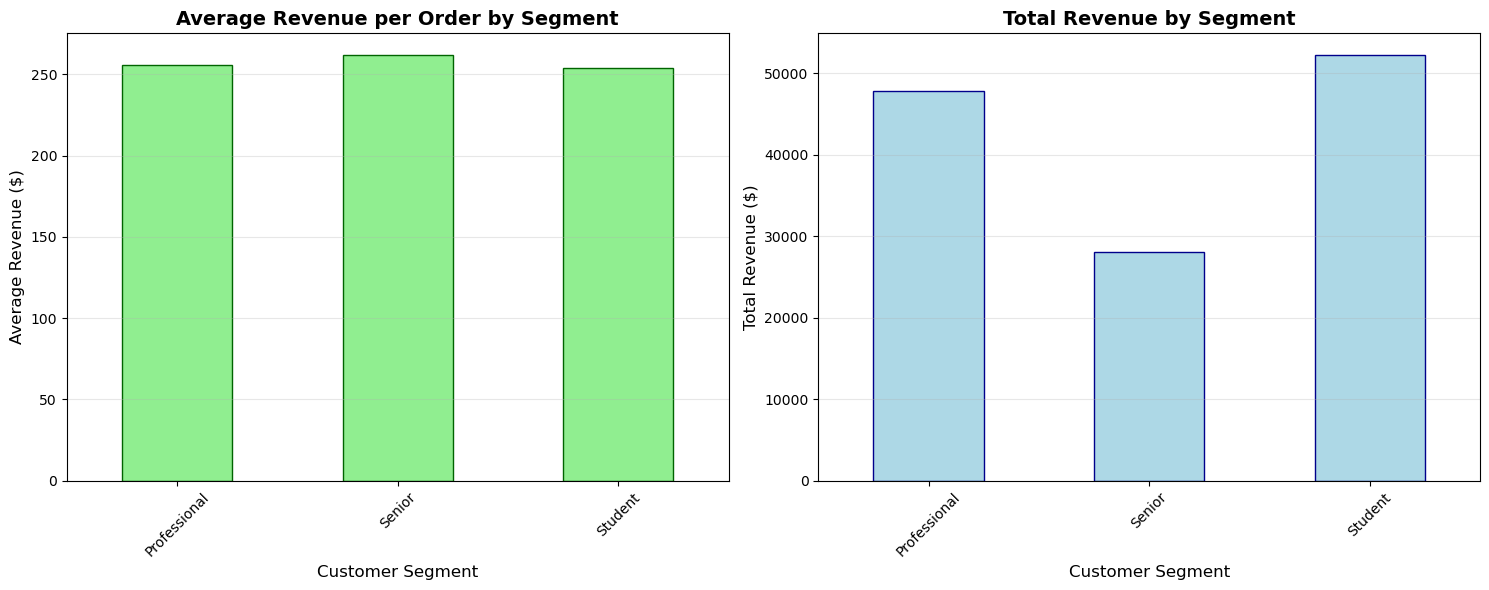


Segment Insights:
- Professional: 187 orders, $255.65 avg/order, $47,807.05 total (37.3% of revenue)
- Senior: 107 orders, $262.13 avg/order, $28,048.33 total (21.9% of revenue)
- Student: 206 orders, $253.81 avg/order, $52,285.29 total (40.8% of revenue)


In [ ]:
# Question 3: Segment Analysis
# Calculate average spending per order by customer segment
segment_analysis = data.groupby("customer_segment")["revenue"].agg(["mean", "sum", "count"]).round(2)
segment_analysis.columns = ["Average_Revenue_Per_Order", "Total_Revenue", "Number_of_Orders"]

print("Customer Segment Analysis:")
print("=" * 50)
print(segment_analysis)

# Find the segment with highest average spending
highest_avg_segment = segment_analysis["Average_Revenue_Per_Order"].idxmax()
highest_avg_value = segment_analysis["Average_Revenue_Per_Order"].max()

print(f"\nHighest Average Spending per Order:")
print(f"Segment: {highest_avg_segment}")
print(f"Average Revenue per Order: ${highest_avg_value:.2f}")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Average revenue per order by segment
segment_analysis["Average_Revenue_Per_Order"].plot(kind="bar", ax=ax1, color="lightgreen", edgecolor="darkgreen")
ax1.set_title("Average Revenue per Order by Segment", fontsize=14, fontweight="bold")
ax1.set_xlabel("Customer Segment", fontsize=12)
ax1.set_ylabel("Average Revenue ($)", fontsize=12)
ax1.tick_params(axis="x", rotation=45)
ax1.grid(axis="y", alpha=0.3)

# Total revenue by segment
segment_analysis["Total_Revenue"].plot(kind="bar", ax=ax2, color="lightblue", edgecolor="darkblue")
ax2.set_title("Total Revenue by Segment", fontsize=14, fontweight="bold")
ax2.set_xlabel("Customer Segment", fontsize=12)
ax2.set_ylabel("Total Revenue ($)", fontsize=12)
ax2.tick_params(axis="x", rotation=45)
ax2.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

# Additional insights
print(f"\nSegment Insights:")
for segment in segment_analysis.index:
    avg_rev = segment_analysis.loc[segment, "Average_Revenue_Per_Order"]
    total_rev = segment_analysis.loc[segment, "Total_Revenue"]
    num_orders = segment_analysis.loc[segment, "Number_of_Orders"]
    percentage = (total_rev / data["revenue"].sum()) * 100
    print(f"- {segment}: {num_orders} orders, ${avg_rev:.2f} avg/order, ${total_rev:,.2f} total ({percentage:.1f}% of revenue)")


Regional Performance Analysis:
        Total_Revenue  Average_Order_Size  Number_of_Orders
region                                                     
East         31221.80              240.17               130
North        34351.69              258.28               133
South        34839.45              274.33               127
West         27727.73              252.07               110

Key Findings:
Highest Revenue Region: South ($34,839.45)
Highest Average Order Size Region: South ($274.33)


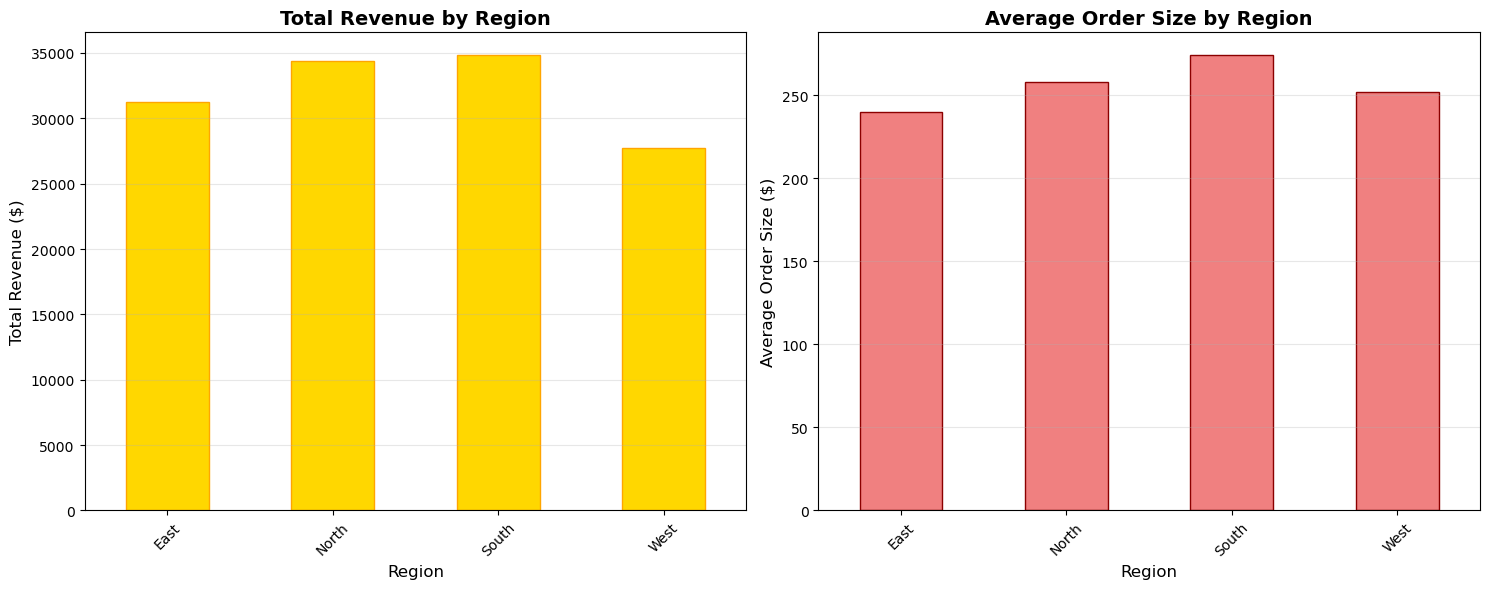


Regional Insights:
- East: 130 orders, $240.17 avg order size, $31,221.80 total (24.4% of revenue)
- North: 133 orders, $258.28 avg order size, $34,351.69 total (26.8% of revenue)
- South: 127 orders, $274.33 avg order size, $34,839.45 total (27.2% of revenue)
- West: 110 orders, $252.07 avg order size, $27,727.73 total (21.6% of revenue)


In [ ]:
# Question 4: Regional Trends
# Calculate regional performance metrics
regional_analysis = data.groupby("region")["revenue"].agg(["sum", "mean", "count"]).round(2)
regional_analysis.columns = ["Total_Revenue", "Average_Order_Size", "Number_of_Orders"]

print("Regional Performance Analysis:")
print("=" * 50)
print(regional_analysis)

# Find highest revenue region
highest_revenue_region = regional_analysis["Total_Revenue"].idxmax()
highest_revenue_value = regional_analysis["Total_Revenue"].max()

# Find highest average order size region
highest_avg_order_region = regional_analysis["Average_Order_Size"].idxmax()
highest_avg_order_value = regional_analysis["Average_Order_Size"].max()

print(f"\nKey Findings:")
print(f"Highest Revenue Region: {highest_revenue_region} (${highest_revenue_value:,.2f})")
print(f"Highest Average Order Size Region: {highest_avg_order_region} (${highest_avg_order_value:.2f})")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Total revenue by region
regional_analysis["Total_Revenue"].plot(kind="bar", ax=ax1, color="gold", edgecolor="orange")
ax1.set_title("Total Revenue by Region", fontsize=14, fontweight="bold")
ax1.set_xlabel("Region", fontsize=12)
ax1.set_ylabel("Total Revenue ($)", fontsize=12)
ax1.tick_params(axis="x", rotation=45)
ax1.grid(axis="y", alpha=0.3)

# Average order size by region
regional_analysis["Average_Order_Size"].plot(kind="bar", ax=ax2, color="lightcoral", edgecolor="darkred")
ax2.set_title("Average Order Size by Region", fontsize=14, fontweight="bold")
ax2.set_xlabel("Region", fontsize=12)
ax2.set_ylabel("Average Order Size ($)", fontsize=12)
ax2.tick_params(axis="x", rotation=45)
ax2.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

# Additional insights
print(f"\nRegional Insights:")
for region in regional_analysis.index:
    total_rev = regional_analysis.loc[region, "Total_Revenue"]
    avg_order = regional_analysis.loc[region, "Average_Order_Size"]
    num_orders = regional_analysis.loc[region, "Number_of_Orders"]
    percentage = (total_rev / data["revenue"].sum()) * 100
    print(f"- {region}: {num_orders} orders, ${avg_order:.2f} avg order size, ${total_rev:,.2f} total ({percentage:.1f}% of revenue)")


Product Category Performance Analysis:
                  Total_Quantity  Total_Revenue  Number_of_Orders  \
product_category                                                    
Books                        227       24046.06                93   
Clothing                     253       24804.57               104   
Electronics                  239       25498.31                99   
Home                         269       29871.47               102   
Sports                       246       23920.26               102   

                  Average_Price_Per_Unit  
product_category                          
Books                             105.93  
Clothing                           98.04  
Electronics                       106.69  
Home                              111.05  
Sports                             97.24  

Key Findings:
Most Popular by Quantity: Home (269 units)
Most Popular by Revenue: Home ($29,871.47)


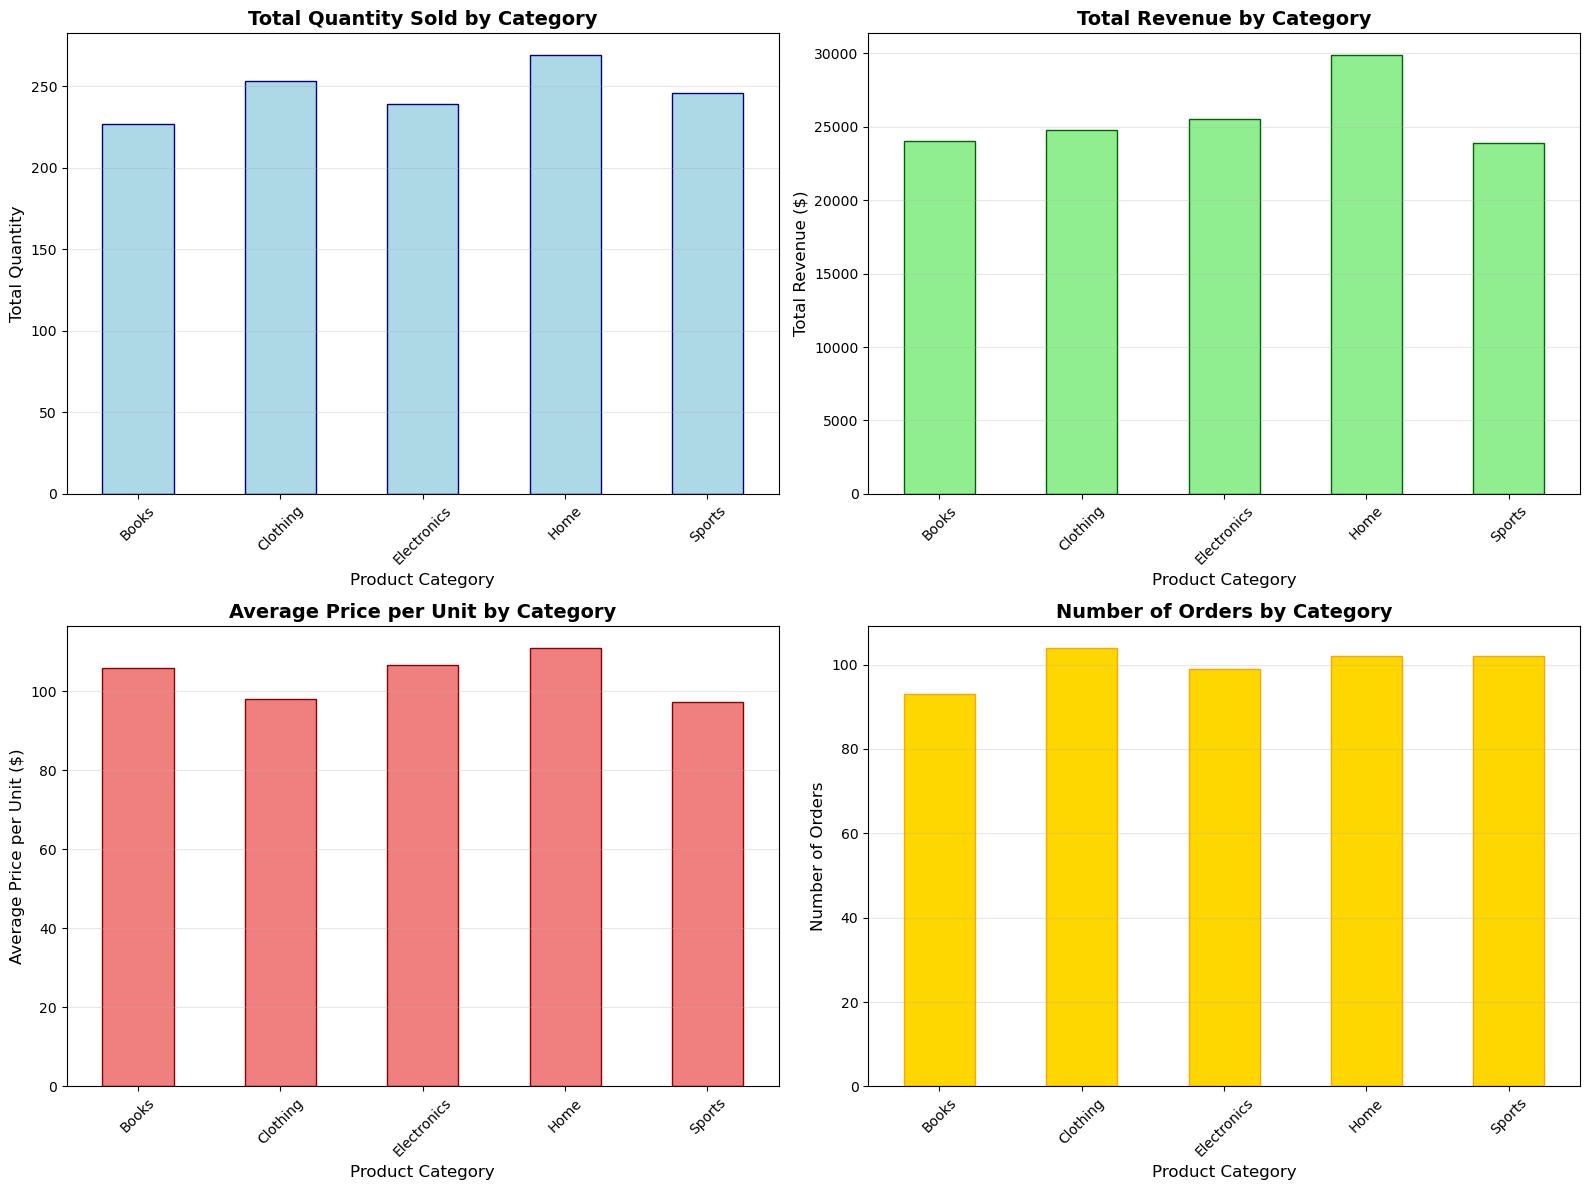


Category Insights:
- Books: 227 units, $24,046.06 revenue, $105.93 avg price, 93 orders (18.8% of revenue)
- Clothing: 253 units, $24,804.57 revenue, $98.04 avg price, 104 orders (19.4% of revenue)
- Electronics: 239 units, $25,498.31 revenue, $106.69 avg price, 99 orders (19.9% of revenue)
- Home: 269 units, $29,871.47 revenue, $111.05 avg price, 102 orders (23.3% of revenue)
- Sports: 246 units, $23,920.26 revenue, $97.24 avg price, 102 orders (18.7% of revenue)


In [ ]:
# Question 5: Product Category Performance
# Calculate category performance by quantity and revenue
category_analysis = data.groupby("product_category").agg({
    "quantity": "sum",
    "revenue": "sum",
    "order_id": "count"
}).round(2)
category_analysis.columns = ["Total_Quantity", "Total_Revenue", "Number_of_Orders"]

# Calculate average price per unit for each category
category_analysis["Average_Price_Per_Unit"] = (category_analysis["Total_Revenue"] / category_analysis["Total_Quantity"]).round(2)

print("Product Category Performance Analysis:")
print("=" * 60)
print(category_analysis)

# Find most popular by quantity vs revenue
most_popular_by_quantity = category_analysis["Total_Quantity"].idxmax()
most_popular_by_revenue = category_analysis["Total_Revenue"].idxmax()

print(f"\nKey Findings:")
print(f"Most Popular by Quantity: {most_popular_by_quantity} ({category_analysis.loc[most_popular_by_quantity, 'Total_Quantity']} units)")
print(f"Most Popular by Revenue: {most_popular_by_revenue} (${category_analysis.loc[most_popular_by_revenue, 'Total_Revenue']:,.2f})")

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Total quantity by category
category_analysis["Total_Quantity"].plot(kind="bar", ax=ax1, color="lightblue", edgecolor="navy")
ax1.set_title("Total Quantity Sold by Category", fontsize=14, fontweight="bold")
ax1.set_xlabel("Product Category", fontsize=12)
ax1.set_ylabel("Total Quantity", fontsize=12)
ax1.tick_params(axis="x", rotation=45)
ax1.grid(axis="y", alpha=0.3)

# Total revenue by category
category_analysis["Total_Revenue"].plot(kind="bar", ax=ax2, color="lightgreen", edgecolor="darkgreen")
ax2.set_title("Total Revenue by Category", fontsize=14, fontweight="bold")
ax2.set_xlabel("Product Category", fontsize=12)
ax2.set_ylabel("Total Revenue ($)", fontsize=12)
ax2.tick_params(axis="x", rotation=45)
ax2.grid(axis="y", alpha=0.3)

# Average price per unit by category
category_analysis["Average_Price_Per_Unit"].plot(kind="bar", ax=ax3, color="lightcoral", edgecolor="darkred")
ax3.set_title("Average Price per Unit by Category", fontsize=14, fontweight="bold")
ax3.set_xlabel("Product Category", fontsize=12)
ax3.set_ylabel("Average Price per Unit ($)", fontsize=12)
ax3.tick_params(axis="x", rotation=45)
ax3.grid(axis="y", alpha=0.3)

# Number of orders by category
category_analysis["Number_of_Orders"].plot(kind="bar", ax=ax4, color="gold", edgecolor="orange")
ax4.set_title("Number of Orders by Category", fontsize=14, fontweight="bold")
ax4.set_xlabel("Product Category", fontsize=12)
ax4.set_ylabel("Number of Orders", fontsize=12)
ax4.tick_params(axis="x", rotation=45)
ax4.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

# Additional insights
print(f"\nCategory Insights:")
for category in category_analysis.index:
    total_qty = category_analysis.loc[category, "Total_Quantity"]
    total_rev = category_analysis.loc[category, "Total_Revenue"]
    avg_price = category_analysis.loc[category, "Average_Price_Per_Unit"]
    num_orders = category_analysis.loc[category, "Number_of_Orders"]
    percentage = (total_rev / data["revenue"].sum()) * 100
    print(f"- {category}: {total_qty} units, ${total_rev:,.2f} revenue, ${avg_price:.2f} avg price, {num_orders} orders ({percentage:.1f}% of revenue)")


Discount Effectiveness Analysis:
              Average_Revenue_Per_Order  Total_Revenue  Number_of_Orders
has_discount                                                            
False                            248.30       60336.01               243
True                             263.83       67804.66               257

Detailed Discount Category Analysis:
                   Average_Revenue_Per_Order  Total_Revenue  Number_of_Orders
discount_category                                                            
10% Discount                          264.53       11639.38                44
15% Discount                          283.81       13906.68                49
20% Discount                          215.79        6689.49                31
25% Discount                          301.36        9040.83                30
30% Discount                          245.01       10780.34                44
5% Discount                           266.91       15747.94                59
No Discount  

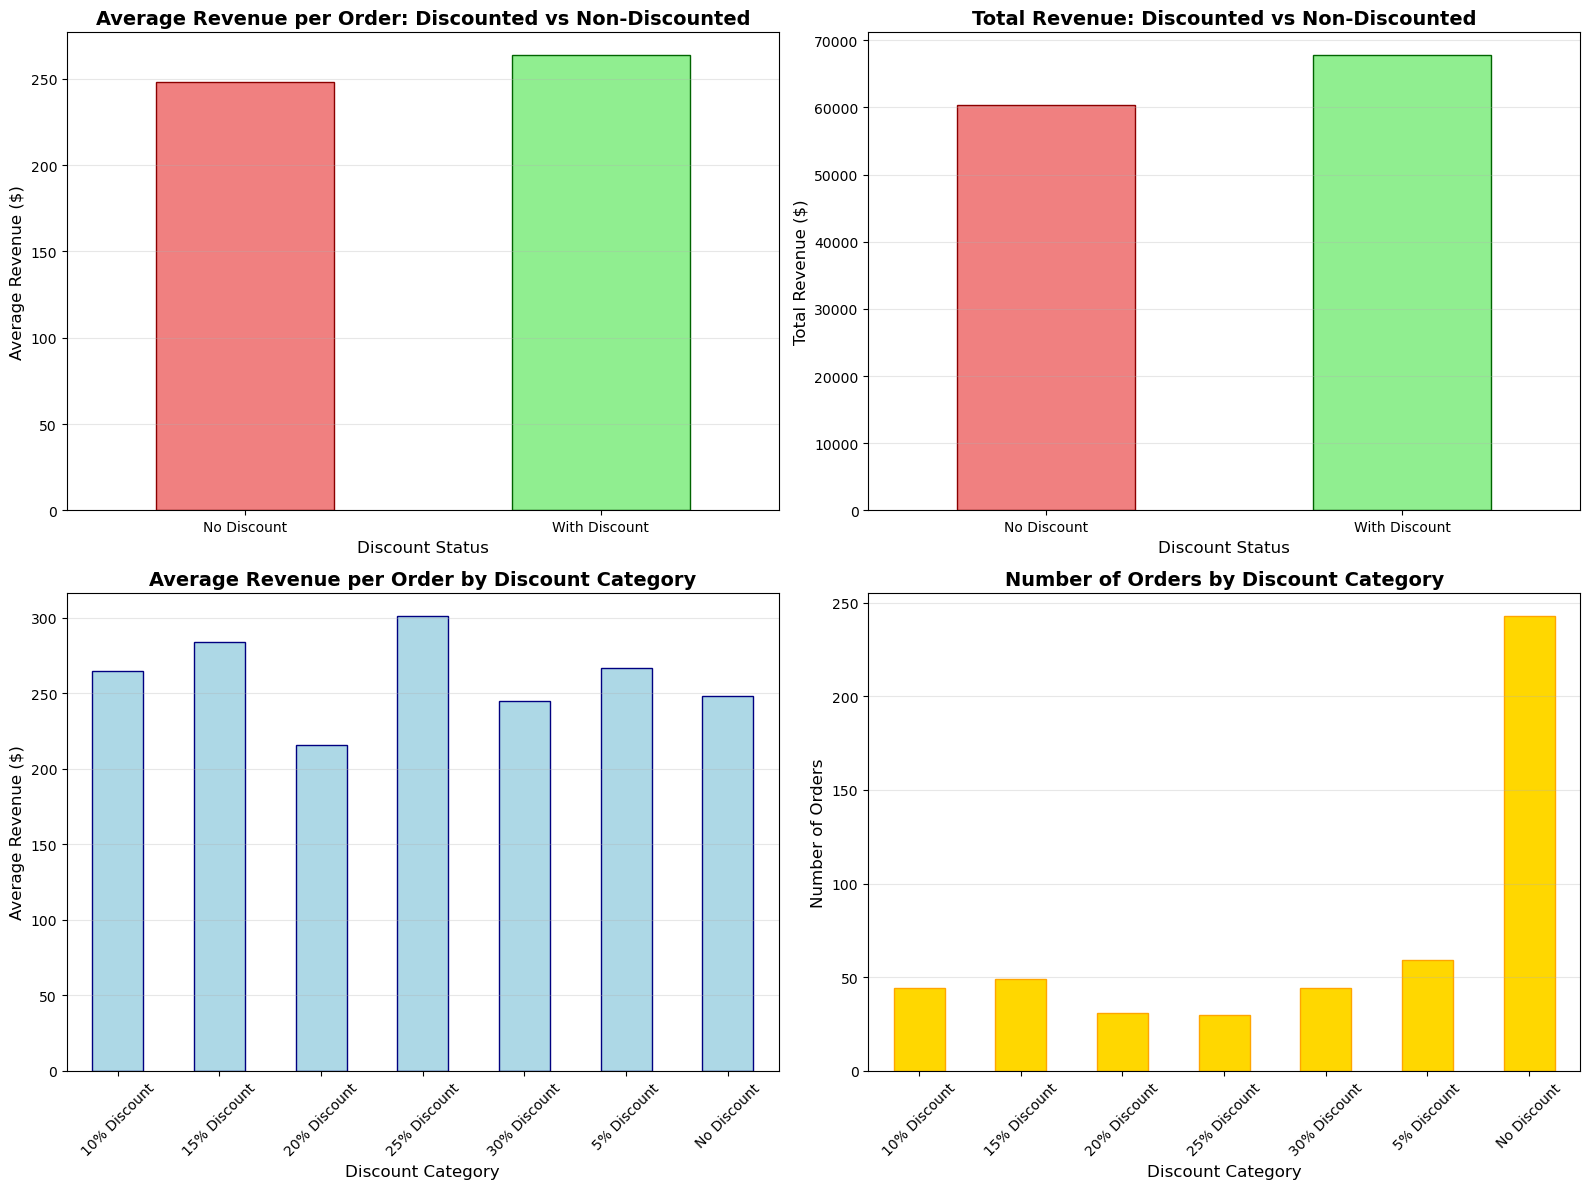


Discount Insights:
- 10% Discount: 44 orders, $264.53 avg revenue, $11,639.38 total (9.1% of revenue)
- 15% Discount: 49 orders, $283.81 avg revenue, $13,906.68 total (10.9% of revenue)
- 20% Discount: 31 orders, $215.79 avg revenue, $6,689.49 total (5.2% of revenue)
- 25% Discount: 30 orders, $301.36 avg revenue, $9,040.83 total (7.1% of revenue)
- 30% Discount: 44 orders, $245.01 avg revenue, $10,780.34 total (8.4% of revenue)
- 5% Discount: 59 orders, $266.91 avg revenue, $15,747.94 total (12.3% of revenue)
- No Discount: 243 orders, $248.30 avg revenue, $60,336.01 total (47.1% of revenue)


In [ ]:
# Question 6: Discount Effectiveness
# Create discount categories
data["has_discount"] = data["discount_applied"] > 0
data["discount_category"] = data["discount_applied"].apply(lambda x: "No Discount" if x == 0 else f"{x}% Discount")

# Calculate revenue metrics by discount status
discount_analysis = data.groupby("has_discount")["revenue"].agg(["mean", "sum", "count"]).round(2)
discount_analysis.columns = ["Average_Revenue_Per_Order", "Total_Revenue", "Number_of_Orders"]

print("Discount Effectiveness Analysis:")
print("=" * 50)
print(discount_analysis)

# Calculate revenue metrics by discount category
discount_category_analysis = data.groupby("discount_category")["revenue"].agg(["mean", "sum", "count"]).round(2)
discount_category_analysis.columns = ["Average_Revenue_Per_Order", "Total_Revenue", "Number_of_Orders"]

print("\nDetailed Discount Category Analysis:")
print("=" * 50)
print(discount_category_analysis)

# Compare discounted vs non-discounted orders
no_discount_avg = discount_analysis.loc[False, "Average_Revenue_Per_Order"]
with_discount_avg = discount_analysis.loc[True, "Average_Revenue_Per_Order"]
difference = with_discount_avg - no_discount_avg

print(f"\nKey Findings:")
print(f"Average Revenue per Order (No Discount): ${no_discount_avg:.2f}")
print(f"Average Revenue per Order (With Discount): ${with_discount_avg:.2f}")
print(f"Difference: ${difference:.2f} ({'Higher' if difference > 0 else 'Lower'} with discounts)")

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Average revenue by discount status
discount_analysis["Average_Revenue_Per_Order"].plot(kind="bar", ax=ax1, color=["lightcoral", "lightgreen"], edgecolor=["darkred", "darkgreen"])
ax1.set_title("Average Revenue per Order: Discounted vs Non-Discounted", fontsize=14, fontweight="bold")
ax1.set_xlabel("Discount Status", fontsize=12)
ax1.set_ylabel("Average Revenue ($)", fontsize=12)
ax1.set_xticklabels(["No Discount", "With Discount"], rotation=0)
ax1.grid(axis="y", alpha=0.3)

# Total revenue by discount status
discount_analysis["Total_Revenue"].plot(kind="bar", ax=ax2, color=["lightcoral", "lightgreen"], edgecolor=["darkred", "darkgreen"])
ax2.set_title("Total Revenue: Discounted vs Non-Discounted", fontsize=14, fontweight="bold")
ax2.set_xlabel("Discount Status", fontsize=12)
ax2.set_ylabel("Total Revenue ($)", fontsize=12)
ax2.set_xticklabels(["No Discount", "With Discount"], rotation=0)
ax2.grid(axis="y", alpha=0.3)

# Average revenue by discount category
discount_category_analysis["Average_Revenue_Per_Order"].plot(kind="bar", ax=ax3, color="lightblue", edgecolor="navy")
ax3.set_title("Average Revenue per Order by Discount Category", fontsize=14, fontweight="bold")
ax3.set_xlabel("Discount Category", fontsize=12)
ax3.set_ylabel("Average Revenue ($)", fontsize=12)
ax3.tick_params(axis="x", rotation=45)
ax3.grid(axis="y", alpha=0.3)

# Number of orders by discount category
discount_category_analysis["Number_of_Orders"].plot(kind="bar", ax=ax4, color="gold", edgecolor="orange")
ax4.set_title("Number of Orders by Discount Category", fontsize=14, fontweight="bold")
ax4.set_xlabel("Discount Category", fontsize=12)
ax4.set_ylabel("Number of Orders", fontsize=12)
ax4.tick_params(axis="x", rotation=45)
ax4.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

# Additional insights
print(f"\nDiscount Insights:")
for category in discount_category_analysis.index:
    avg_rev = discount_category_analysis.loc[category, "Average_Revenue_Per_Order"]
    total_rev = discount_category_analysis.loc[category, "Total_Revenue"]
    num_orders = discount_category_analysis.loc[category, "Number_of_Orders"]
    percentage = (total_rev / data["revenue"].sum()) * 100
    print(f"- {category}: {num_orders} orders, ${avg_rev:.2f} avg revenue, ${total_rev:,.2f} total ({percentage:.1f}% of revenue)")


Payment Method Analysis:
                Average_Revenue_Per_Order  Total_Revenue  Number_of_Orders  \
payment_method                                                               
Credit Card                        257.44       35269.86               137   
Debit Card                         275.98       33945.62               123   
Gift Card                          254.36       31540.95               124   
PayPal                             236.07       27384.24               116   

                Percentage_of_Orders  
payment_method                        
Credit Card                     27.4  
Debit Card                      24.6  
Gift Card                       24.8  
PayPal                          23.2  

Key Findings:
Most Popular Payment Method: Credit Card (27.4% of orders)
Highest Average Spending: Debit Card ($275.98 per order)


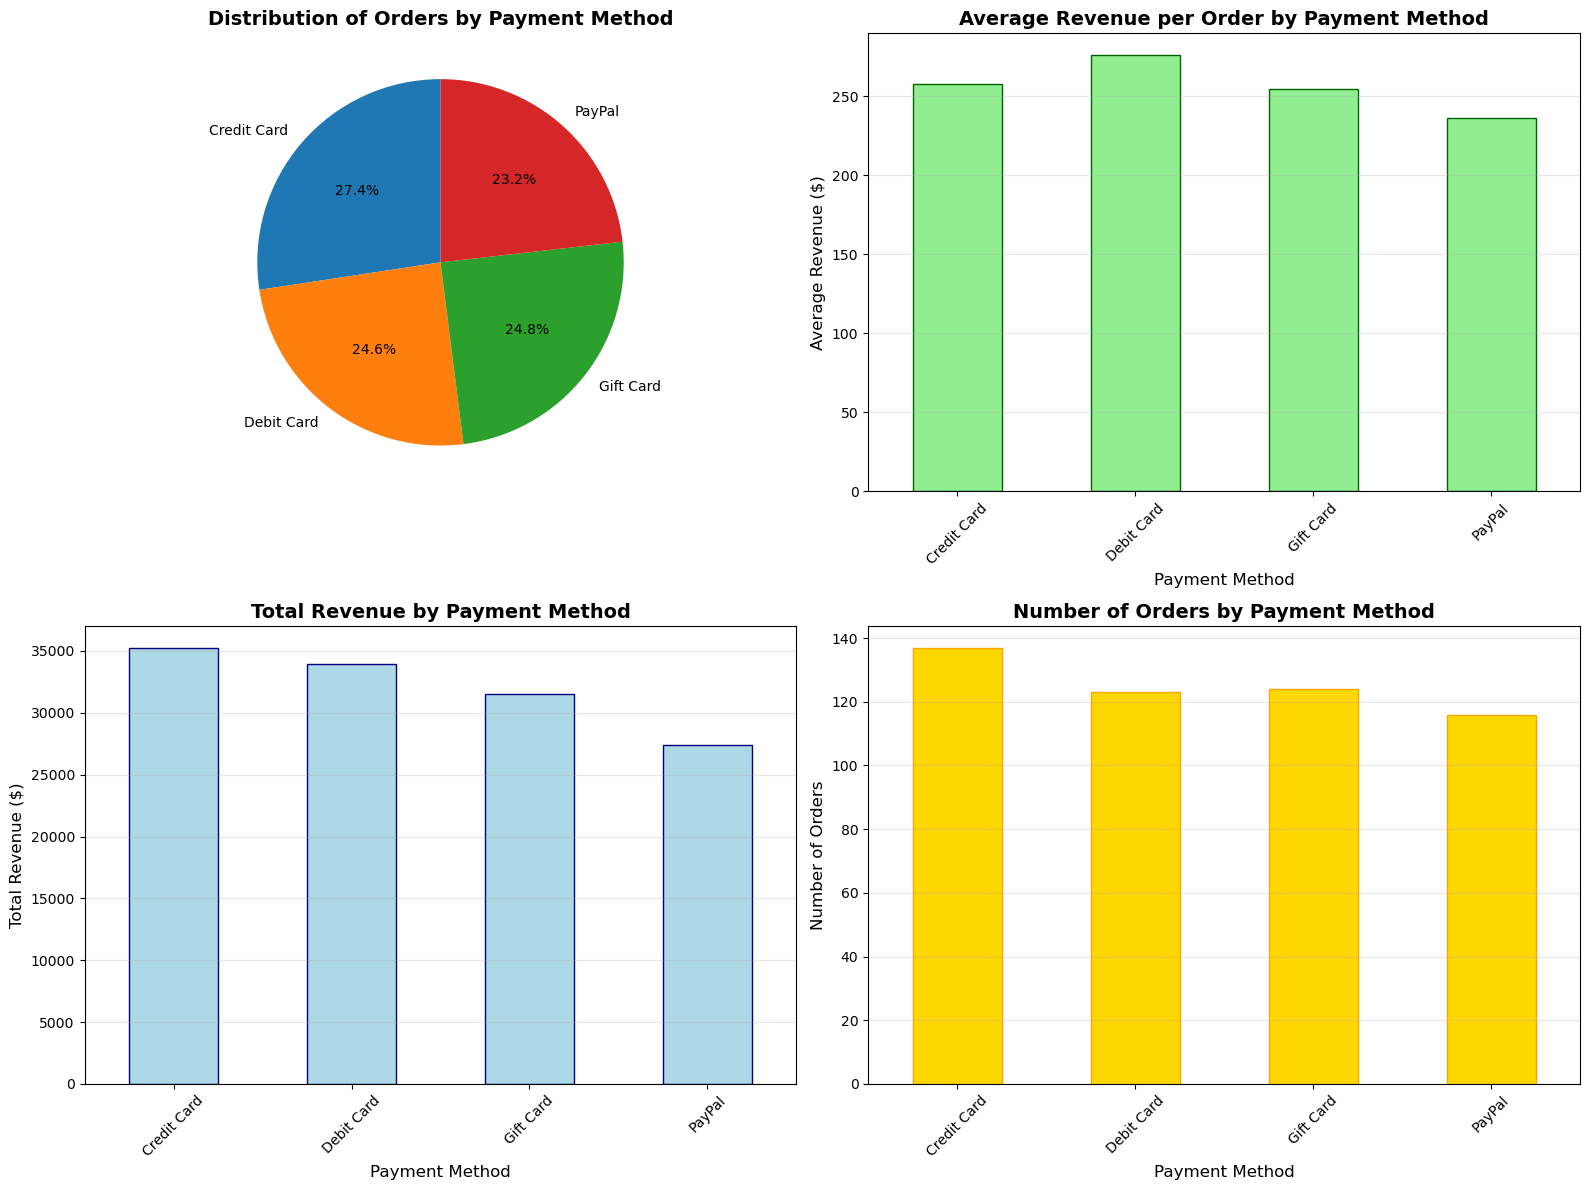


Payment Method Insights:
- Credit Card: 137 orders (27.4%), $257.44 avg revenue, $35,269.86 total (27.5% of revenue)
- Debit Card: 123 orders (24.6%), $275.98 avg revenue, $33,945.62 total (26.5% of revenue)
- Gift Card: 124 orders (24.8%), $254.36 avg revenue, $31,540.95 total (24.6% of revenue)
- PayPal: 116 orders (23.2%), $236.07 avg revenue, $27,384.24 total (21.4% of revenue)


In [ ]:
# Question 7: Payment Method Usage
# Calculate payment method analysis
payment_analysis = data.groupby("payment_method")["revenue"].agg(["mean", "sum", "count"]).round(2)
payment_analysis.columns = ["Average_Revenue_Per_Order", "Total_Revenue", "Number_of_Orders"]

# Calculate percentage of orders for each payment method
total_orders = len(data)
payment_analysis["Percentage_of_Orders"] = (payment_analysis["Number_of_Orders"] / total_orders * 100).round(1)

print("Payment Method Analysis:")
print("=" * 60)
print(payment_analysis)

# Find payment method with highest average spending
highest_spending_method = payment_analysis["Average_Revenue_Per_Order"].idxmax()
highest_spending_value = payment_analysis["Average_Revenue_Per_Order"].max()

# Find most popular payment method
most_popular_method = payment_analysis["Number_of_Orders"].idxmax()
most_popular_percentage = payment_analysis.loc[most_popular_method, "Percentage_of_Orders"]

print(f"\nKey Findings:")
print(f"Most Popular Payment Method: {most_popular_method} ({most_popular_percentage}% of orders)")
print(f"Highest Average Spending: {highest_spending_method} (${highest_spending_value:.2f} per order)")

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Percentage of orders by payment method (pie chart)
payment_analysis["Percentage_of_Orders"].plot(kind="pie", ax=ax1, autopct="%1.1f%%", startangle=90)
ax1.set_title("Distribution of Orders by Payment Method", fontsize=14, fontweight="bold")
ax1.set_ylabel("")

# Average revenue per order by payment method
payment_analysis["Average_Revenue_Per_Order"].plot(kind="bar", ax=ax2, color="lightgreen", edgecolor="darkgreen")
ax2.set_title("Average Revenue per Order by Payment Method", fontsize=14, fontweight="bold")
ax2.set_xlabel("Payment Method", fontsize=12)
ax2.set_ylabel("Average Revenue ($)", fontsize=12)
ax2.tick_params(axis="x", rotation=45)
ax2.grid(axis="y", alpha=0.3)

# Total revenue by payment method
payment_analysis["Total_Revenue"].plot(kind="bar", ax=ax3, color="lightblue", edgecolor="navy")
ax3.set_title("Total Revenue by Payment Method", fontsize=14, fontweight="bold")
ax3.set_xlabel("Payment Method", fontsize=12)
ax3.set_ylabel("Total Revenue ($)", fontsize=12)
ax3.tick_params(axis="x", rotation=45)
ax3.grid(axis="y", alpha=0.3)

# Number of orders by payment method
payment_analysis["Number_of_Orders"].plot(kind="bar", ax=ax4, color="gold", edgecolor="orange")
ax4.set_title("Number of Orders by Payment Method", fontsize=14, fontweight="bold")
ax4.set_xlabel("Payment Method", fontsize=12)
ax4.set_ylabel("Number of Orders", fontsize=12)
ax4.tick_params(axis="x", rotation=45)
ax4.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

# Additional insights
print(f"\nPayment Method Insights:")
for method in payment_analysis.index:
    avg_rev = payment_analysis.loc[method, "Average_Revenue_Per_Order"]
    total_rev = payment_analysis.loc[method, "Total_Revenue"]
    num_orders = payment_analysis.loc[method, "Number_of_Orders"]
    percentage = payment_analysis.loc[method, "Percentage_of_Orders"]
    rev_percentage = (total_rev / data["revenue"].sum()) * 100
    print(f"- {method}: {num_orders} orders ({percentage}%), ${avg_rev:.2f} avg revenue, ${total_rev:,.2f} total ({rev_percentage:.1f}% of revenue)")


Revenue by Day of Week Analysis:
             Total_Revenue  Average_Revenue_Per_Order  Number_of_Orders
day_of_week                                                            
Monday            17704.70                     245.90                72
Tuesday           18968.41                     263.45                72
Wednesday         18908.21                     266.31                71
Thursday          17846.36                     251.36                71
Friday            18522.40                     260.88                71
Saturday          18660.35                     262.82                71
Sunday            17530.24                     243.48                72

Key Findings:
Busiest Day: Tuesday ($18,968.41)
Least Busy Day: Sunday ($17,530.24)
Weekend Revenue: $36,190.59
Weekday Revenue: $91,950.08
Weekends are less busy than weekdays


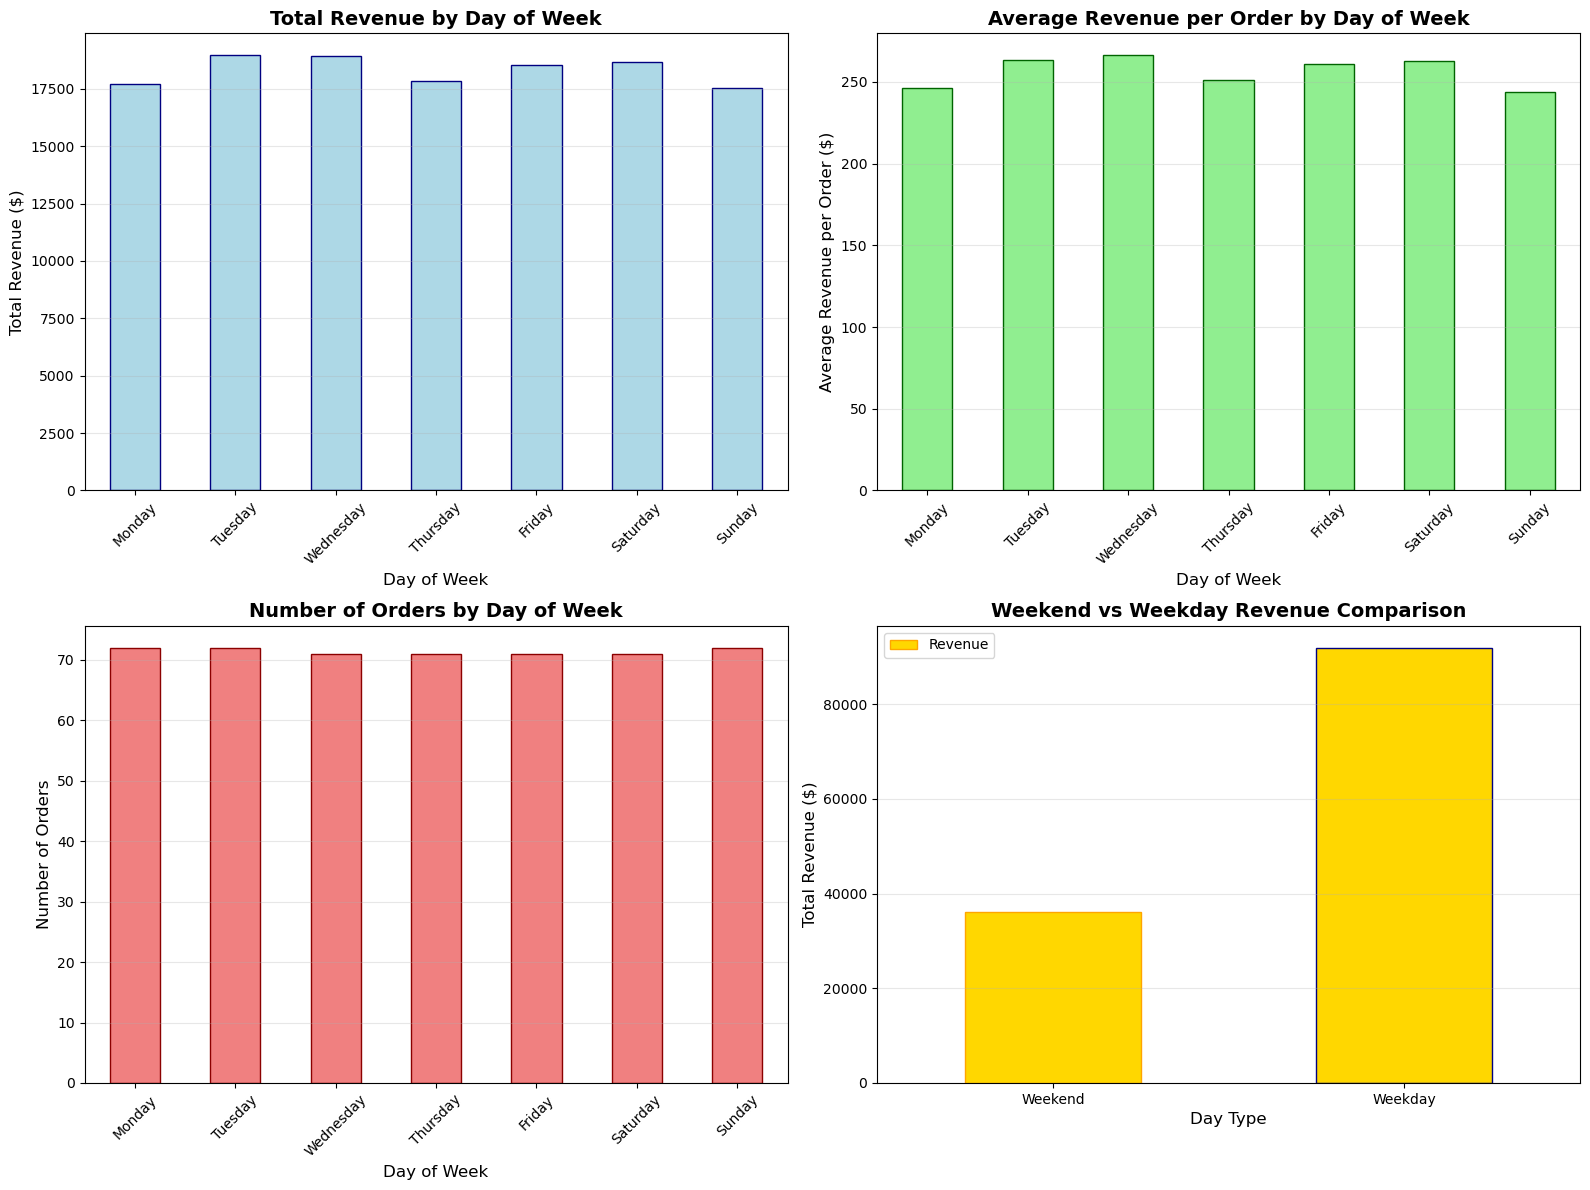


Day of Week Insights:
- Monday (Weekday): 72 orders, $245.90 avg revenue, $17,704.70 total (13.8% of revenue)
- Tuesday (Weekday): 72 orders, $263.45 avg revenue, $18,968.41 total (14.8% of revenue)
- Wednesday (Weekday): 71 orders, $266.31 avg revenue, $18,908.21 total (14.8% of revenue)
- Thursday (Weekday): 71 orders, $251.36 avg revenue, $17,846.36 total (13.9% of revenue)
- Friday (Weekday): 71 orders, $260.88 avg revenue, $18,522.40 total (14.5% of revenue)
- Saturday (Weekend): 71 orders, $262.82 avg revenue, $18,660.35 total (14.6% of revenue)
- Sunday (Weekend): 72 orders, $243.48 avg revenue, $17,530.24 total (13.7% of revenue)


In [ ]:
# Question 8: Seasonality Check
# Add day of week column if not already present
data["day_of_week"] = data["order_date"].dt.day_name()

# Calculate revenue by day of week
day_analysis = data.groupby("day_of_week")["revenue"].agg(["sum", "mean", "count"]).round(2)
day_analysis.columns = ["Total_Revenue", "Average_Revenue_Per_Order", "Number_of_Orders"]

# Order days properly (Monday to Sunday)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_analysis = day_analysis.reindex(day_order)

print("Revenue by Day of Week Analysis:")
print("=" * 50)
print(day_analysis)

# Find busiest and least busy days
busiest_day = day_analysis["Total_Revenue"].idxmax()
busiest_revenue = day_analysis["Total_Revenue"].max()
least_busy_day = day_analysis["Total_Revenue"].idxmin()
least_busy_revenue = day_analysis["Total_Revenue"].min()

# Calculate weekend vs weekday performance
weekend_days = ["Saturday", "Sunday"]
weekday_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

weekend_revenue = day_analysis.loc[weekend_days, "Total_Revenue"].sum()
weekday_revenue = day_analysis.loc[weekday_days, "Total_Revenue"].sum()

print(f"\nKey Findings:")
print(f"Busiest Day: {busiest_day} (${busiest_revenue:,.2f})")
print(f"Least Busy Day: {least_busy_day} (${least_busy_revenue:,.2f})")
print(f"Weekend Revenue: ${weekend_revenue:,.2f}")
print(f"Weekday Revenue: ${weekday_revenue:,.2f}")
print(f"Weekends are {'busier' if weekend_revenue > weekday_revenue else 'less busy'} than weekdays")

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Total revenue by day of week
day_analysis["Total_Revenue"].plot(kind="bar", ax=ax1, color="lightblue", edgecolor="navy")
ax1.set_title("Total Revenue by Day of Week", fontsize=14, fontweight="bold")
ax1.set_xlabel("Day of Week", fontsize=12)
ax1.set_ylabel("Total Revenue ($)", fontsize=12)
ax1.tick_params(axis="x", rotation=45)
ax1.grid(axis="y", alpha=0.3)

# Average revenue per order by day of week
day_analysis["Average_Revenue_Per_Order"].plot(kind="bar", ax=ax2, color="lightgreen", edgecolor="darkgreen")
ax2.set_title("Average Revenue per Order by Day of Week", fontsize=14, fontweight="bold")
ax2.set_xlabel("Day of Week", fontsize=12)
ax2.set_ylabel("Average Revenue per Order ($)", fontsize=12)
ax2.tick_params(axis="x", rotation=45)
ax2.grid(axis="y", alpha=0.3)

# Number of orders by day of week
day_analysis["Number_of_Orders"].plot(kind="bar", ax=ax3, color="lightcoral", edgecolor="darkred")
ax3.set_title("Number of Orders by Day of Week", fontsize=14, fontweight="bold")
ax3.set_xlabel("Day of Week", fontsize=12)
ax3.set_ylabel("Number of Orders", fontsize=12)
ax3.tick_params(axis="x", rotation=45)
ax3.grid(axis="y", alpha=0.3)

# Weekend vs Weekday comparison
weekend_weekday_data = pd.DataFrame({
    "Weekend": [weekend_revenue],
    "Weekday": [weekday_revenue]
}, index=["Revenue"])
weekend_weekday_data.T.plot(kind="bar", ax=ax4, color=["gold", "lightblue"], edgecolor=["orange", "navy"])
ax4.set_title("Weekend vs Weekday Revenue Comparison", fontsize=14, fontweight="bold")
ax4.set_xlabel("Day Type", fontsize=12)
ax4.set_ylabel("Total Revenue ($)", fontsize=12)
ax4.tick_params(axis="x", rotation=0)
ax4.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

# Additional insights
print(f"\nDay of Week Insights:")
for day in day_analysis.index:
    total_rev = day_analysis.loc[day, "Total_Revenue"]
    avg_rev = day_analysis.loc[day, "Average_Revenue_Per_Order"]
    num_orders = day_analysis.loc[day, "Number_of_Orders"]
    percentage = (total_rev / data["revenue"].sum()) * 100
    day_type = "Weekend" if day in weekend_days else "Weekday"
    print(f"- {day} ({day_type}): {num_orders} orders, ${avg_rev:.2f} avg revenue, ${total_rev:,.2f} total ({percentage:.1f}% of revenue)")


Profitability Analysis by Region:
        Total_Revenue  Total_Profit  Number_of_Orders  \
region                                                  
East         31221.80       6244.36               130   
North        34351.69       6870.34               133   
South        34839.45       6967.89               127   
West         27727.73       5545.55               110   

        Profit_Margin_Percentage  Average_Profit_Per_Order  
region                                                      
East                        20.0                     48.03  
North                       20.0                     51.66  
South                       20.0                     54.87  
West                        20.0                     50.41  

Key Findings:
Total Company Profit: $25,628.13
Total Company Revenue: $128,140.67
Overall Profit Margin: 20.0%
Most Profitable Region: South ($6,967.89 profit)


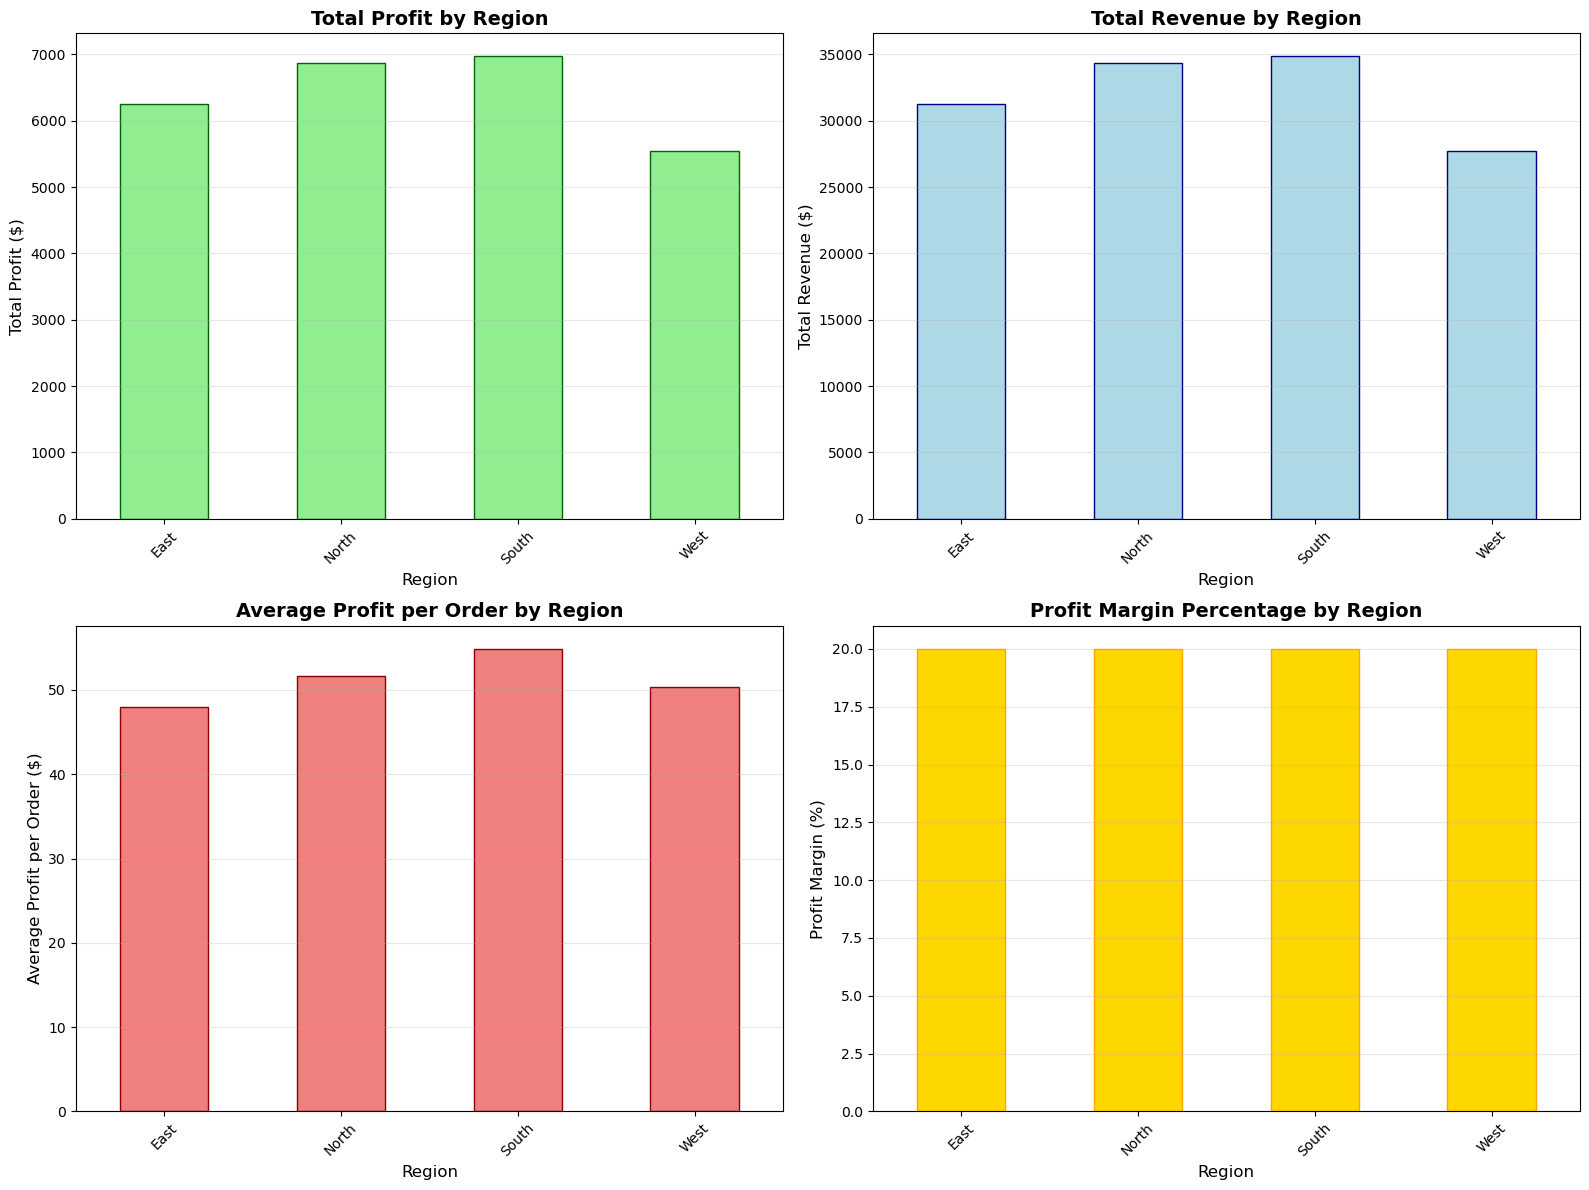


Regional Profitability Insights:
- East: 130 orders, $48.03 avg profit/order, $6,244.36 total profit (100.0% of total profit)
- North: 133 orders, $51.66 avg profit/order, $6,870.34 total profit (100.0% of total profit)
- South: 127 orders, $54.87 avg profit/order, $6,967.89 total profit (100.0% of total profit)
- West: 110 orders, $50.41 avg profit/order, $5,545.55 total profit (100.0% of total profit)


In [ ]:
# Question 9: Profitability Analysis
# Assume profit margin = 20% of revenue
profit_margin = 0.20

# Calculate profit by region
data["profit"] = data["revenue"] * profit_margin

# Calculate profitability metrics by region
profitability_analysis = data.groupby("region").agg({
    "revenue": "sum",
    "profit": "sum",
    "order_id": "count"
}).round(2)
profitability_analysis.columns = ["Total_Revenue", "Total_Profit", "Number_of_Orders"]

# Calculate profit margin percentage (should be 20% for all regions)
profitability_analysis["Profit_Margin_Percentage"] = (profitability_analysis["Total_Profit"] / profitability_analysis["Total_Revenue"] * 100).round(1)

# Calculate average profit per order
profitability_analysis["Average_Profit_Per_Order"] = (profitability_analysis["Total_Profit"] / profitability_analysis["Number_of_Orders"]).round(2)

print("Profitability Analysis by Region:")
print("=" * 60)
print(profitability_analysis)

# Find most profitable region
most_profitable_region = profitability_analysis["Total_Profit"].idxmax()
most_profitable_profit = profitability_analysis["Total_Profit"].max()

# Calculate total company profit
total_profit = data["profit"].sum()
total_revenue = data["revenue"].sum()

print(f"\nKey Findings:")
print(f"Total Company Profit: ${total_profit:,.2f}")
print(f"Total Company Revenue: ${total_revenue:,.2f}")
print(f"Overall Profit Margin: {(total_profit/total_revenue)*100:.1f}%")
print(f"Most Profitable Region: {most_profitable_region} (${most_profitable_profit:,.2f} profit)")

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Total profit by region
profitability_analysis["Total_Profit"].plot(kind="bar", ax=ax1, color="lightgreen", edgecolor="darkgreen")
ax1.set_title("Total Profit by Region", fontsize=14, fontweight="bold")
ax1.set_xlabel("Region", fontsize=12)
ax1.set_ylabel("Total Profit ($)", fontsize=12)
ax1.tick_params(axis="x", rotation=45)
ax1.grid(axis="y", alpha=0.3)

# Total revenue by region
profitability_analysis["Total_Revenue"].plot(kind="bar", ax=ax2, color="lightblue", edgecolor="navy")
ax2.set_title("Total Revenue by Region", fontsize=14, fontweight="bold")
ax2.set_xlabel("Region", fontsize=12)
ax2.set_ylabel("Total Revenue ($)", fontsize=12)
ax2.tick_params(axis="x", rotation=45)
ax2.grid(axis="y", alpha=0.3)

# Average profit per order by region
profitability_analysis["Average_Profit_Per_Order"].plot(kind="bar", ax=ax3, color="lightcoral", edgecolor="darkred")
ax3.set_title("Average Profit per Order by Region", fontsize=14, fontweight="bold")
ax3.set_xlabel("Region", fontsize=12)
ax3.set_ylabel("Average Profit per Order ($)", fontsize=12)
ax3.tick_params(axis="x", rotation=45)
ax3.grid(axis="y", alpha=0.3)

# Profit margin percentage by region (should all be 20%)
profitability_analysis["Profit_Margin_Percentage"].plot(kind="bar", ax=ax4, color="gold", edgecolor="orange")
ax4.set_title("Profit Margin Percentage by Region", fontsize=14, fontweight="bold")
ax4.set_xlabel("Region", fontsize=12)
ax4.set_ylabel("Profit Margin (%)", fontsize=12)
ax4.tick_params(axis="x", rotation=45)
ax4.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

# Additional insights
print(f"\nRegional Profitability Insights:")
for region in profitability_analysis.index:
    total_rev = profitability_analysis.loc[region, "Total_Revenue"]
    total_profit = profitability_analysis.loc[region, "Total_Profit"]
    avg_profit = profitability_analysis.loc[region, "Average_Profit_Per_Order"]
    num_orders = profitability_analysis.loc[region, "Number_of_Orders"]
    profit_percentage = (total_profit / total_profit.sum()) * 100
    print(f"- {region}: {num_orders} orders, ${avg_profit:.2f} avg profit/order, ${total_profit:,.2f} total profit ({profit_percentage:.1f}% of total profit)")


In [ ]:
# Question 10: Business Recommendation
# Let's summarize key findings from our analysis
print("=" * 80)
print("BUSINESS ANALYSIS SUMMARY & STRATEGIC RECOMMENDATIONS")
print("=" * 80)

# Key metrics summary
total_revenue = data["revenue"].sum()
total_orders = len(data)
avg_order_value = total_revenue / total_orders

print(f"\n📊 KEY METRICS:")
print(f"• Total Revenue: ${total_revenue:,.2f}")
print(f"• Total Orders: {total_orders:,}")
print(f"• Average Order Value: ${avg_order_value:.2f}")

# Top findings from each analysis
print(f"\n🔍 KEY FINDINGS:")

# Revenue overview
monthly_revenue = data.groupby("month")["revenue"].sum()
best_month = monthly_revenue.idxmax()
worst_month = monthly_revenue.idxmin()
print(f"• Best performing month: {best_month} (${monthly_revenue.max():,.2f})")
print(f"• Worst performing month: {worst_month} (${monthly_revenue.min():,.2f})")

# Customer segments
segment_analysis = data.groupby("customer_segment")["revenue"].mean()
best_segment = segment_analysis.idxmax()
print(f"• Highest spending segment: {best_segment} (${segment_analysis.max():.2f} avg/order)")

# Regional performance
regional_analysis = data.groupby("region")["revenue"].sum()
best_region = regional_analysis.idxmax()
print(f"• Top revenue region: {best_region} (${regional_analysis.max():,.2f})")

# Product categories
category_analysis = data.groupby("product_category")["revenue"].sum()
top_category = category_analysis.idxmax()
print(f"• Top revenue category: {top_category} (${category_analysis.max():,.2f})")

# Discount effectiveness
discount_analysis = data.groupby("has_discount")["revenue"].mean()
no_discount_avg = discount_analysis.loc[False]
with_discount_avg = discount_analysis.loc[True]
print(f"• Discount impact: {'Higher' if with_discount_avg > no_discount_avg else 'Lower'} revenue with discounts")

# Payment methods
payment_analysis = data.groupby("payment_method")["revenue"].mean()
best_payment = payment_analysis.idxmax()
print(f"• Highest spending payment method: {best_payment} (${payment_analysis.max():.2f} avg/order)")

# Day of week
day_analysis = data.groupby("day_of_week")["revenue"].sum()
busiest_day = day_analysis.idxmax()
print(f"• Busiest day: {busiest_day} (${day_analysis.max():,.2f})")

print(f"\n💡 STRATEGIC RECOMMENDATIONS:")
print("=" * 50)

print(f"\n1. 🎯 CUSTOMER SEGMENT FOCUS:")
print(f"   • Prioritize {best_segment} segment with targeted marketing campaigns")
print(f"   • Develop premium products/services for high-value customers")
print(f"   • Implement loyalty programs to retain top customers")

print(f"\n2. 🌍 REGIONAL EXPANSION:")
print(f"   • Invest more marketing budget in {best_region} region")
print(f"   • Analyze successful strategies from {best_region} to replicate in other regions")
print(f"   • Consider regional-specific product offerings")

print(f"\n3. 📦 PRODUCT STRATEGY:")
print(f"   • Focus inventory and marketing on {top_category} category")
print(f"   • Cross-sell complementary products within top categories")
print(f"   • Optimize pricing strategy for high-revenue categories")

print(f"\n4. 💳 PAYMENT & DISCOUNT STRATEGY:")
if with_discount_avg > no_discount_avg:
    print(f"   • Increase discount offerings to boost average order value")
    print(f"   • Implement strategic discount campaigns during low-revenue periods")
else:
    print(f"   • Reduce discount frequency to improve profit margins")
    print(f"   • Focus on value-added services instead of price reductions")

print(f"   • Promote {best_payment} payment method for higher-value transactions")
print(f"   • Offer incentives for preferred payment methods")

print(f"\n5. 📅 TIMING & SEASONALITY:")
print(f"   • Increase marketing efforts on {busiest_day}s")
print(f"   • Plan promotional campaigns during {worst_month} to boost sales")
print(f"   • Optimize inventory levels based on seasonal patterns")

print(f"\n6. 📈 GROWTH OPPORTUNITIES:")
print(f"   • Target underperforming regions with {best_region} strategies")
print(f"   • Develop products for {best_segment} segment preferences")
print(f"   • Implement dynamic pricing based on day-of-week patterns")

print(f"\n🎯 PRIMARY RECOMMENDATION:")
print(f"Focus on expanding {best_segment} customer acquisition in {best_region} region")
print(f"with {top_category} product emphasis and {best_payment} payment incentives.")
print(f"This combination leverages your strongest performing segments for maximum ROI.")

print(f"\n" + "=" * 80)


BUSINESS ANALYSIS SUMMARY & STRATEGIC RECOMMENDATIONS

📊 KEY METRICS:
• Total Revenue: $128,140.67
• Total Orders: 500
• Average Order Value: $256.28

🔍 KEY FINDINGS:
• Best performing month: 2023-09 ($9,708.06)
• Worst performing month: 2024-05 ($4,314.71)
• Highest spending segment: Senior ($262.13 avg/order)
• Top revenue region: South ($34,839.45)
• Top revenue category: Home ($29,871.47)
• Discount impact: Higher revenue with discounts
• Highest spending payment method: Debit Card ($275.98 avg/order)
• Busiest day: Tuesday ($18,968.41)

💡 STRATEGIC RECOMMENDATIONS:

1. 🎯 CUSTOMER SEGMENT FOCUS:
   • Prioritize Senior segment with targeted marketing campaigns
   • Develop premium products/services for high-value customers
   • Implement loyalty programs to retain top customers

2. 🌍 REGIONAL EXPANSION:
   • Invest more marketing budget in South region
   • Analyze successful strategies from South to replicate in other regions
   • Consider regional-specific product offerings

3. 📦 

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.